In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import pandas as pd
directory = "C:/Users/Anuj/Downloads"
file_name = "data.csv"
path = f"{directory}/{file_name}"

newdata = pd.read_csv(path, encoding='ISO-8859-1')
newdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:

print(newdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [4]:
print('Duplicates: {}'.format(newdata.duplicated().sum()))
newdata.drop_duplicates(inplace = True)

Duplicates: 5268


In [6]:
cate_columns=newdata.select_dtypes(include=['category','object'])
numeric_columns=newdata.select_dtypes(include=['int','float'])

In [7]:
print(newdata.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [8]:
df1 = newdata.dropna(subset=['CustomerID'])

print('Dataframe dimensions:', df1.shape)
tab_info = pd.DataFrame({
    'column type': df1.dtypes,
    'null values (nb)': df1.isnull().sum(),
    'null values (%)': (df1.isnull().sum() / df1.shape[0]) * 100
}).T

display(tab_info)

Dataframe dimensions: (401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,object,float64,float64,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
temp = df1[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print(len(countries))

37


In [10]:
df2 = df1.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
df3 = df2.rename(columns = {'InvoiceDate':'Number of products'})
df3[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [11]:
df3['order_canceled'] = df3['InvoiceNo'].apply(lambda x: int('C' in x))
display(df3[:10].sort_values('CustomerID'))
overall_percentage_canceled = df3['order_canceled'].sum() / df3.shape[0] * 100
print('Overall Percentage of Orders Canceled: {:.2f}%'.format(overall_percentage_canceled))

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
5,12347.0,556201,18,0
6,12347.0,562032,22,0
7,12347.0,573511,47,0
8,12347.0,581180,11,0
9,12348.0,539318,17,0


Overall Percentage of Orders Canceled: 16.47%


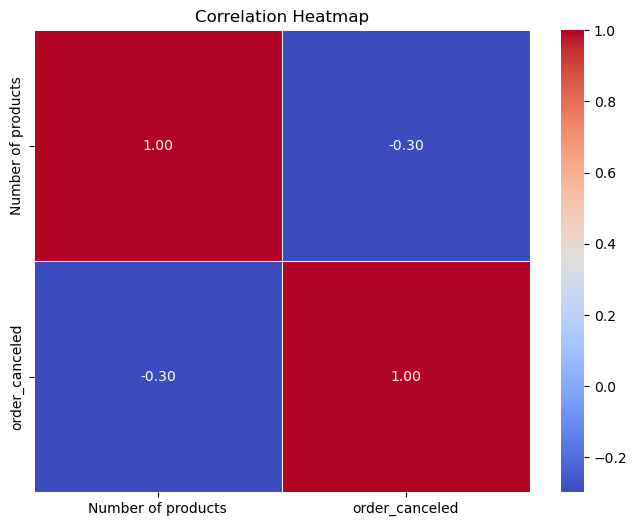

In [12]:
import seaborn as sns
features_for_correlation = ['Number of products', 'order_canceled']
correlation_data = df3[features_for_correlation]

correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\abassi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abassi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abassi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abassi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

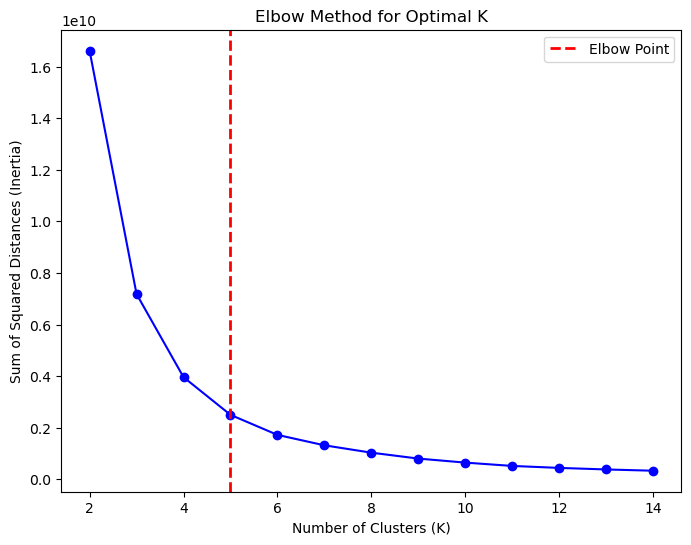

Optimal number of clusters (k): 5


In [13]:
from kneed import KneeLocator

# Assuming df3 is your DataFrame, exclude non-numeric columns
numeric_columns = df3.select_dtypes(include='number')

inertia_values = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(numeric_columns)
    inertia_values.append(kmeans.inertia_)

# Using KneeLocator to find the elbow point
kl = KneeLocator(range(2, 15), inertia_values, curve="convex", direction="decreasing")
elbow_point = kl.elbow

plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.axvline(x=elbow_point, color='red', linestyle='--', linewidth=2, label='Elbow Point')
plt.legend()
plt.show()

# Now 'elbow_point' contains the automatically detected optimal k
print("Optimal number of clusters (k):", elbow_point)

In [14]:
from sklearn.cluster import KMeans

# Assuming df3 is your DataFrame and elbow_point is the optimal number of clusters
kmeans = KMeans(n_clusters=elbow_point, random_state=0)
kmeans.fit(numeric_columns)  # Use numeric columns only

# Add the cluster labels to the original DataFrame
df3['KMeans_Cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df3.head())

C:\Users\abassi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustomerID InvoiceNo  Number of products  order_canceled  KMeans_Cluster
0     12346.0    541431                   1               0               1
1     12346.0   C541433                   1               1               1
2     12347.0    537626                  31               0               1
3     12347.0    542237                  29               0               1
4     12347.0    549222                  24               0               1


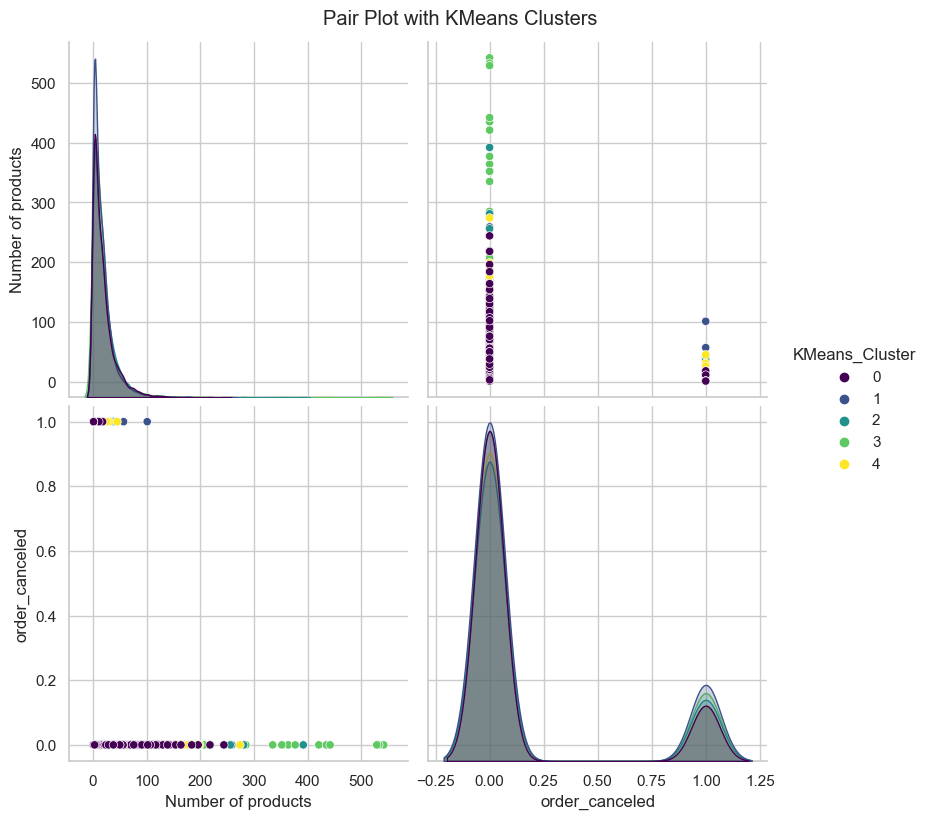

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Number of products' and 'order_canceled' as features
feature1 = 'Number of products'
feature2 = 'order_canceled'

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pair plot and color points by KMeans cluster
sns.pairplot(df3, hue='KMeans_Cluster', vars=[feature1, feature2], palette='viridis', height=4)
plt.suptitle('Pair Plot with KMeans Clusters', y=1.02)
plt.show()

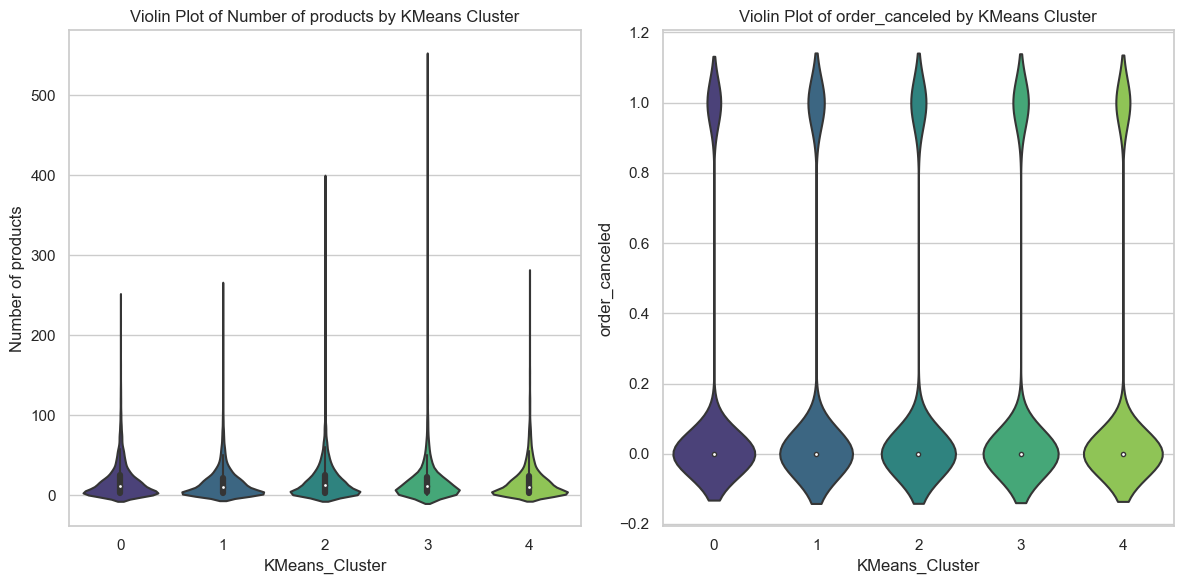

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Number of products' and 'order_canceled' as features
feature1 = 'Number of products'
feature2 = 'order_canceled'

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a violin plot for each feature, split by KMeans cluster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='KMeans_Cluster', y=feature1, data=df3, palette='viridis')
plt.title(f'Violin Plot of {feature1} by KMeans Cluster')

plt.subplot(1, 2, 2)
sns.violinplot(x='KMeans_Cluster', y=feature2, data=df3, palette='viridis')
plt.title(f'Violin Plot of {feature2} by KMeans Cluster')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture

# Assuming 'Number of products' and 'order_canceled' as features
features_for_clustering = ['Number of products', 'order_canceled']

# Create a subset of the DataFrame with the selected features
X = df3[features_for_clustering]

# Find the BIC and AIC scores for different numbers of components
n_components = range(1, 11)
bic_scores = []
aic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Print the BIC and AIC scores
print("BIC Scores:", bic_scores)
print("AIC Scores:", aic_scores)

BIC Scores: [219763.90349336996, -54926.17581876612, -68350.40246960023, -71068.4359641983, -71652.4442813382, -79409.25644139116, -74513.14386292931, -78776.079831908, -78754.56420150101, -81296.4295422068]
AIC Scores: [219723.86650829032, -55014.257185941315, -68486.52821887098, -71252.60609556461, -71884.65879480008, -79689.51533694859, -74841.4471405823, -79152.42749165656, -79178.95624334512, -81768.86596614646]


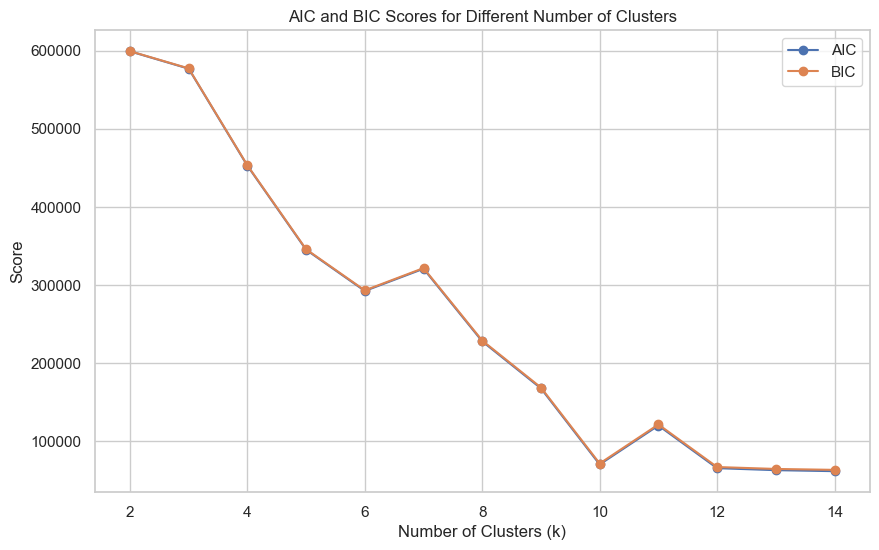

In [18]:
df4 = df3.drop(columns=['InvoiceNo']) 

aic_scores = []
bic_scores = []

for k in range(2, 15):
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(df4)
    
    aic_scores.append(gmm.aic(df4))
    bic_scores.append(gmm.bic(df4))

# Plot AIC and BIC scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), aic_scores, marker='o', label='AIC')
plt.plot(range(2, 15), bic_scores, marker='o', label='BIC')
plt.title('AIC and BIC Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.show()

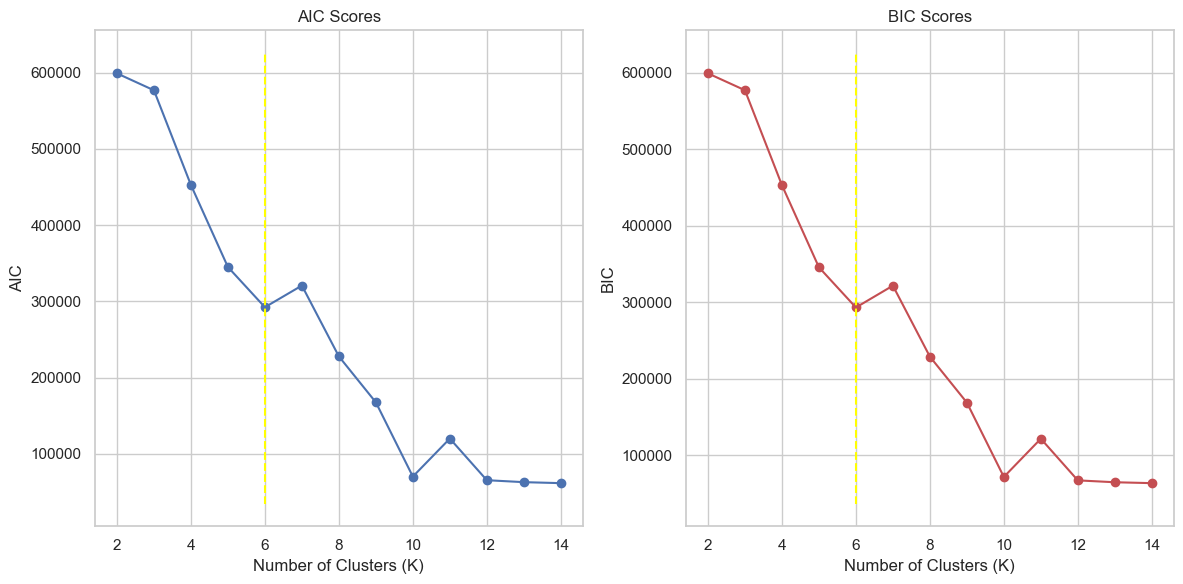

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 15), aic_scores, marker='o', linestyle='-', color='b')
plt.title('AIC Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('AIC')

# Find the elbow point for AIC
k1 = KneeLocator(range(2, 15), aic_scores, curve='convex', direction='decreasing')
plt.vlines(k1.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='yellow', label='AIC Elbow')

# Plot BIC scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), bic_scores, marker='o', linestyle='-', color='r')
plt.title('BIC Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC')

# Find the elbow point for BIC
k2 = KneeLocator(range(2, 15), bic_scores, curve='convex', direction='decreasing')
plt.vlines(k2.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='yellow', label='BIC Elbow')

plt.tight_layout()
plt.show()

In [20]:
print("Fitting GMM...")
gmm.fit(df4)
print("GMM fitting complete.")

Fitting GMM...
GMM fitting complete.


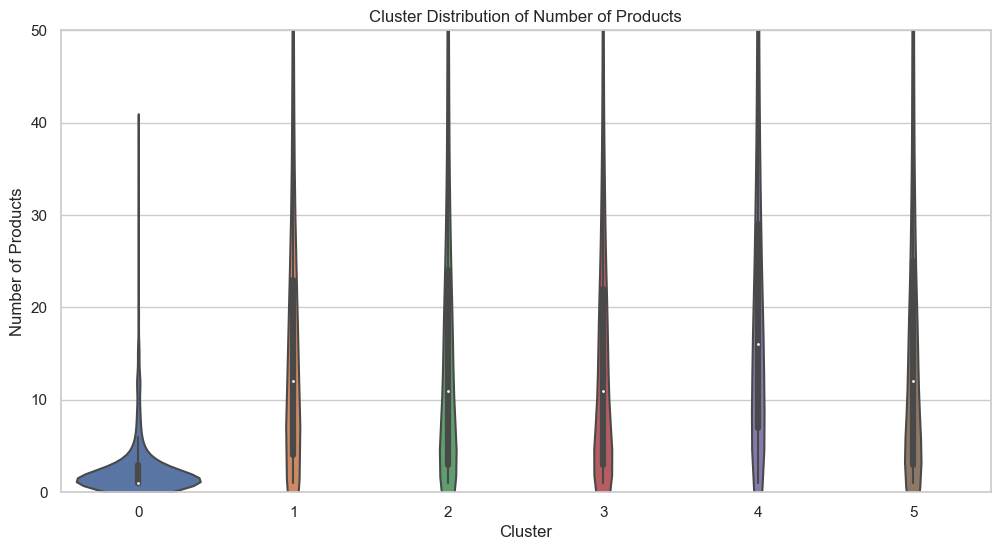

In [21]:
gmm = GaussianMixture(n_components=k1.elbow, random_state=0)
gmm.fit(df4)

# Predict the cluster labels
gmm_labels = gmm.predict(df4)

# Add cluster labels to the DataFrame
df4['Cluster'] = gmm_labels

# Plot violin plots for each cluster
plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster', y='Number of products', data=df4)
plt.title('Cluster Distribution of Number of Products')
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.ylim(0, 50)
plt.show()